In [1]:
# Import neuron
from neuron import h,gui

# Import Mechanisms
import os
current_directory = os.getcwd()
print(current_directory)
path = os.path.join(current_directory, "mechanisms", "nrnmech.dll")
print(path)
h.nrn_load_dll(path)

# Import utilities 
from neuron.units import ms,mV,um,V,m 
import matplotlib.pyplot as plt 
import numpy as np 
h.load_file("stdrun.hoc")
h.cvode_active(0) #turn off variable time step
# h.load_file("anatscale.hoc")

c:\Users\Pc\Documents\Charite\NEURON\Extracellular_test\Homogeneous_E-field
c:\Users\Pc\Documents\Charite\NEURON\Extracellular_test\Homogeneous_E-field\mechanisms\nrnmech.dll


0.0

In [2]:
#Local Field Potential calculation
#h.load_file("./functions/field.hoc")

##### Import cell model
from functions.ballandstick import BallAndStick,BallAndStick_pas,BallAndStick2
cell=BallAndStick2(0,0,0,0,0,0)
print(cell.soma.nseg,cell.dend.nseg)

# Interpolate and set pointers between xtra and extracellular
h.load_file("./functions/interpxyz.hoc")
h.load_file("./functions/setpointers.hoc")


1 151
After any change to cell geometry or nseg, be sure to invoke setpointers()


1.0

In [3]:
from functions.base_shape import base_shape
shape=base_shape()

In [4]:
from functions.calcrx import setelec,homogenous,set_uniform_field_between_plates

v_plate=40*V #- potential difference between the plates
distance=1*m #distance
field_orientation=np.array([1,0,0])#along the x axis
ref_point=[0,0,0] #reference point with a 0 e_extracellular

set_uniform_field_between_plates(v_plate,distance,field_orientation,ref_point)

In [5]:
dt=1*ms
simtime=1000*ms
depth=0
modfreq=0
v_init=-65*mV

h.dt=dt
h.v_init=v_init

In [6]:
import functions.stim as stim
ton=20
amp=1000
dur=900
freq=10
depth=1
modfreq=5
times,stim1=stim.ampmodulation_wiki(ton,amp,depth,dt,dur,simtime,freq,modfreq)

In [7]:
simparams=[dt,simtime]
stimparams=[v_plate,ton,amp,dur,freq,depth,modfreq]
run_id=0
#Save parameters to a file
from functions.savedata import saveparams
folder=saveparams(run_id,cell,simparams,stimparams)

c:\Users\Pc\Documents\Charite\NEURON\Extracellular_test\Homogeneous_E-field


In [8]:
t=h.Vector().record(h._ref_t)
is_xtra=h.Vector().record(h._ref_is_xtra)
soma_v=h.Vector().record(cell.soma(0.5)._ref_v)
dend_v=h.Vector().record(cell.dend(0.5)._ref_v)
extracellular_v_soma = h.Vector().record(cell.soma(0.5)._ref_vext[0])


In [9]:
import functions.calculate_max as calculate_max

# results,callback=max_shift(cell)
results, file, callback=calculate_max.master_callback(cell, folder, run_id,2)






In [10]:
h.finitialize(v_init)
h.continuerun(simtime)

0.0

In [11]:
print(results)
for key, value in results.items():
    print(f"{key}: {type(value)}")

{'max_v': 0, 'min_v': 100000.0, 'max_seg': BallAndStick2[0].soma(0.5), 'min_seg': BallAndStick2[0].soma(0.5), 'max_sec': BallAndStick2[0].soma, 'min_sec': BallAndStick2[0].soma}
max_v: <class 'int'>
min_v: <class 'float'>
max_seg: <class 'nrn.Segment'>
min_seg: <class 'nrn.Segment'>
max_sec: <class 'nrn.Section'>
min_sec: <class 'nrn.Section'>


In [12]:
from functions.shapeplot_movie import max_min_shape
mark_max, mark_min=max_min_shape(results,shape)

Max voltage: 0 at section BallAndStick2[0].soma, x=0.5
Min voltage: 100000.0 at section BallAndStick2[0].soma, x=0.5


In [ ]:
h.finitialize(v_init)
# ps=calculate_max.highlight_max_min_voltage(results,1)

1.0

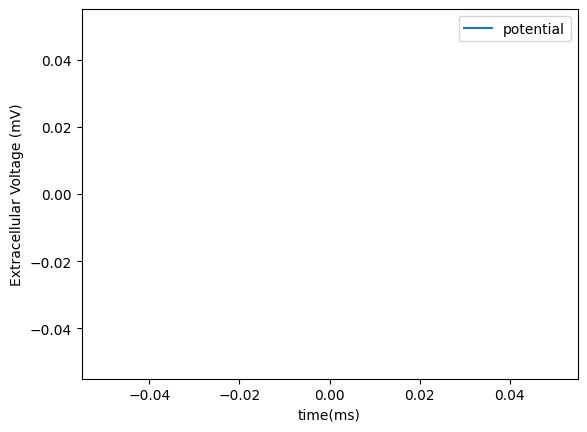

In [ ]:
plt.Figure()
plt.plot(t,extracellular_v_soma,label="potential")
plt.xlabel("time(ms)")
plt.ylabel("Extracellular Voltage (mV)")
plt.legend()
plt.show()

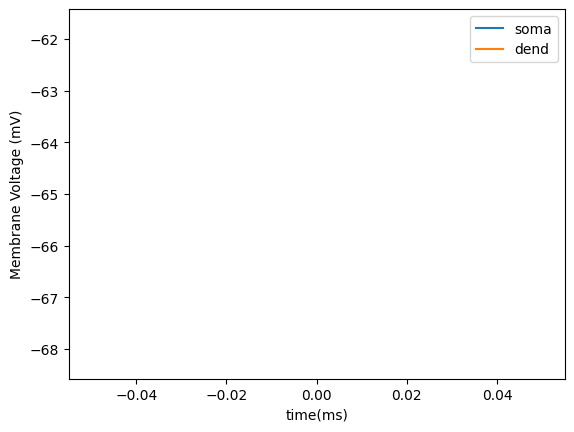

In [ ]:
plt.Figure()
plt.plot(t,soma_v,label="soma")
plt.plot(t,dend_v,label="dend")
plt.xlabel("time(ms)")
plt.ylabel("Membrane Voltage (mV)") #vint-vext~
plt.legend()
plt.show()

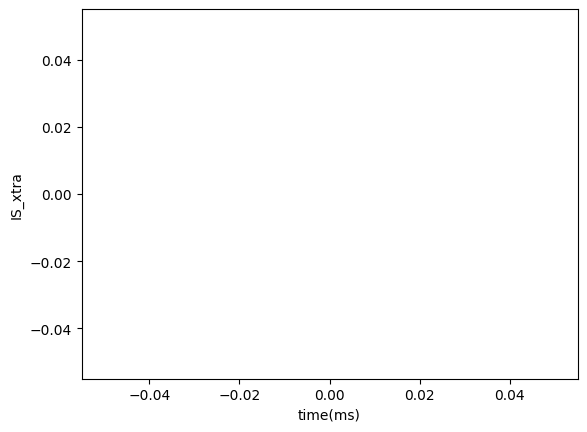

: 

In [ ]:
plt.Figure()
plt.plot(t,is_xtra)
plt.xlabel("time(ms)")
plt.ylabel("IS_xtra")
plt.show()